In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
######################################################################## UTILITY FUNCTIONS ######################################################################################

In [53]:
''' converts from '.csv' file to a numpy array '''
def extractData(s):
  data_df = pd.read_csv(s, header = None)
  return data_df.to_numpy()

In [54]:
''' seperates the first column of a np array as index / serial numbers'''
def seperateFeatures(data):
  return data[:,1:], data[:,0]

In [55]:
''' returns np array with sigmoid value of each entry : sigmoid(x) = 1/(1+exp(-x)) '''
def sigmoid (data):
  return (1/(1 + np.exp(-data)))

In [56]:
''' return matrix with an added bias row (of all ones) as the first row of the given matrix '''
def addBias(X):
  m = X.shape[0]
  u = np.ones((m,1))
  X = np.append(u, X, axis = 1)
  return X

In [57]:
''' returns np array with values scaled data by the formula : (x-mean)/(standard deviation) '''
def meanScaling(data):
  mean = np.mean(data, axis=0)

  std = np.std(data, axis=0)
  for i in range(std.size):
    std[i] = 1 if (std[i] == False) else (std[i] == std[i])
    
  return ((data - np.mean(data, axis=0))/std)

In [58]:
'''Calculates accuracy as (number of correct predictions) *100/(total number of predictions)'''
def accuracy(h, y):
  m = h.size
  count = 0
  for i in range(m):
    if (h[i] == y[i]):
      count+=1
  return (count*100)/m

In [59]:
#################################################################################################################################################################################

In [60]:
'''calculates loss for logistic regression'''
def logisticCost(y, hypothesis):
  m = y.size
  cost = -(1/m)*(np.sum(y*np.log(hypothesis)) + np.sum((1-y)*np.log(1-hypothesis)))
  return cost

In [61]:
'''calculates  gradient for logistic regression'''
def logisticGrad(X, y, hypothesis, reg_coeff, theta):
  m = y.shape[0]
  k = theta.shape[1]
  theta_c = theta.copy()
  theta_c[0] = np.zeros((1,k))
  grad = (1/m)*(X.T@(hypothesis - y) + reg_coeff*theta_c)
  return grad

In [62]:
'''Converts vector with each entry representing class number to probability matrix with zeros and ones'''
def vectorToMatrix(y, num_class):
  m = y.size
  Y = np.zeros((m, num_class))
  count = 0
  for i in y:
    Y[count][i-1] = 1
    count +=1
  
  return Y

In [63]:
'''Converts probability matrix to vector with each entry representing class number'''
def matrixToVector(a):
  y = np.argmax(a, axis=1)+1
  y.shape = (y.size, 1)
  return y

In [64]:
def train(X_train, y_train, num_iter, num_class, alpha, reg_coeff):

  '''
  X_train     --> design matrix (before adding features)
  y_train     --> target value / true result (m x 1)
  num_iter    --> number of iteration (int)
  alpha       --> learning rate
  reg_coeff   --> regularisation coefficient
  '''
  
  m, n = X_train.shape
  # m --> number of trainig examples
  # n --> number of features 

  #Converting vector y to probability matrix Y
  Y = vectorToMatrix(y_train, num_class)

  #Scaling and adding bias term to training design matrix
  X_train = meanScaling(X_train)
  X = addBias(X_train)

  #initializing losses
  losses = []

  #initializing theta
  theta = np.zeros((n+1,num_class))

  #training loop
  for i in range(num_iter):

    hypothesis = sigmoid(X@theta)

    #calculating and appending losses
    losses.append(logisticCost(Y, hypothesis))

    #calculating gradient
    grad = logisticGrad(X, Y, hypothesis, reg_coeff, theta)

    #updating theta
    theta -= alpha*grad

    print(i, "loss = ", losses[i])

  plt.plot(losses)
  return theta

In [65]:
def predict(X, y, theta, num_class):

  '''
  X           --> Design matrix of features of testing data
  y           --> Target value vector of testing data
  theta       --> parameter obtained after training
  num_classes --> number of classes
  '''

  m = X.shape[0]
  # m = number of testing examples

  # scaling and adding bias to test design matrix
  X = meanScaling(X)
  X = addBias(X)

  hypothesis = sigmoid(X@theta)

  #converting y vector to probability matrix Y
  Y = vectorToMatrix(y, num_class)

  #calculating loss
  loss = logisticCost(Y, hypothesis)
  print("loss = ", loss)
  
  #converting hypothesis (probability matrix) to class vector
  y_predicted = matrixToVector(hypothesis)
  
  print("Accuracy = ", accuracy(y_predicted, y))

  return y_predicted

In [66]:
data_train = extractData('/content/drive/MyDrive/WOC/Datasets/emnist-letters-train.csv')
X_train, y_train = seperateFeatures(data_train)

In [67]:
data_test = extractData('/content/drive/MyDrive/WOC/Datasets/emnist-letters-test.csv')
X_test, y_test = seperateFeatures(data_test)

0 loss =  0.6931471805599486
1 loss =  0.6829034011469927
2 loss =  0.6804973753503017
3 loss =  0.6794307337275202
4 loss =  0.6788315131225103
5 loss =  0.6784480622536092
6 loss =  0.6781785705455955
7 loss =  0.6779765865011077
8 loss =  0.67781805800376
9 loss =  0.6776893577796389
10 loss =  0.6775821585887566
11 loss =  0.6774910558895361
12 loss =  0.6774123706817391
13 loss =  0.6773434989833748
14 loss =  0.6772825384143915
15 loss =  0.6772280618162112
16 loss =  0.677178974519724
17 loss =  0.6771344208465858
18 loss =  0.677093721021237
19 loss =  0.6770563273868998
20 loss =  0.6770217933044699
21 loss =  0.6769897505781943
22 loss =  0.676959892764931
23 loss =  0.6769319626237733
24 loss =  0.6769057425392826
25 loss =  0.6768810471161428
26 loss =  0.6768577173853274
27 loss =  0.676835616222872
28 loss =  0.6768146246929746
29 loss =  0.6767946391036941
30 loss =  0.6767755686178158
31 loss =  0.6767573333002254
32 loss =  0.6767398625114869
33 loss =  0.6767230935781

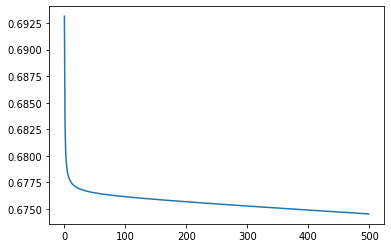

In [68]:
theta = train(X_train, y_train, 500, 26, 0.000016, 0)

In [69]:
h = predict(X_train, y_train, theta, 26)

loss =  0.6745208702335936
Accuracy =  57.792792792792795


In [70]:
h = predict(X_test, y_test, theta, 26)

loss =  0.676593966461495
Accuracy =  55.0
